(4802, 29)


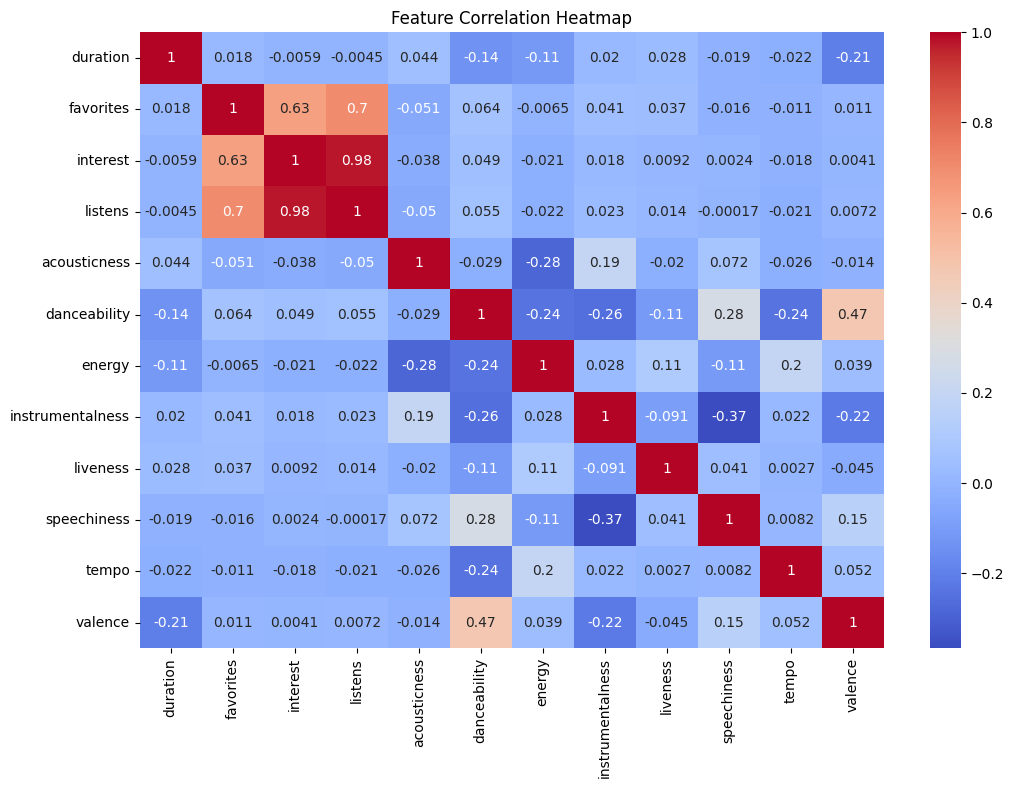

Index(['track_id', 'bit_rate', 'comments', 'duration', 'favorites', 'interest',
       'listens', 'number', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence'],
      dtype='object')
   track_id  bit_rate  comments        composer         date_created  \
0       153    256000         0  Arc and Sender  2008-11-26 01:45:00   
1       154    256000         0  Arc and Sender  2008-11-26 01:45:04   
2       155    192000         0             NaN  2008-11-26 01:45:10   
3       169    192000         0   James Squeaky  2008-11-26 01:46:02   
4       170    192000         0             NaN  2008-11-26 01:46:05   

         date_recorded  duration  favorites genre_top genres  ... tags  \
0  2008-11-26 00:00:00       405          5      Rock   [26]  ...   []   
1  2008-11-26 00:00:00       319          1      Rock   [26]  ...   []   
2  2008-11-26 00:00:00       756          1      Rock   [26]  ...   []   
3  2006-01-01 00:00:00  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

csv_data = pd.read_csv('fma-rock-vs-hiphop.csv')
json_data = pd.read_json('echonest-metrics.json')

data = pd.merge(csv_data, json_data, on='track_id',how='inner')
print(data.shape)

data.head()

data.isnull().sum()

data = data.dropna(subset=['genre_top'])

numeric_columns = [
    'duration', 'favorites', 'interest', 'listens', 
    'acousticness', 'danceability', 'energy', 
    'instrumentalness', 'liveness', 'speechiness', 
    'tempo', 'valence'
]
numeric_data = data[numeric_columns]
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
print(data.select_dtypes(include=[np.number]).columns)
print(data.head())
X = data[['bit_rate', 'duration', 'favorites', 'interest', 'listens', 
          'acousticness', 'danceability', 'energy', 'instrumentalness', 
          'liveness', 'speechiness', 'tempo', 'valence']]
y = data['genre_top']



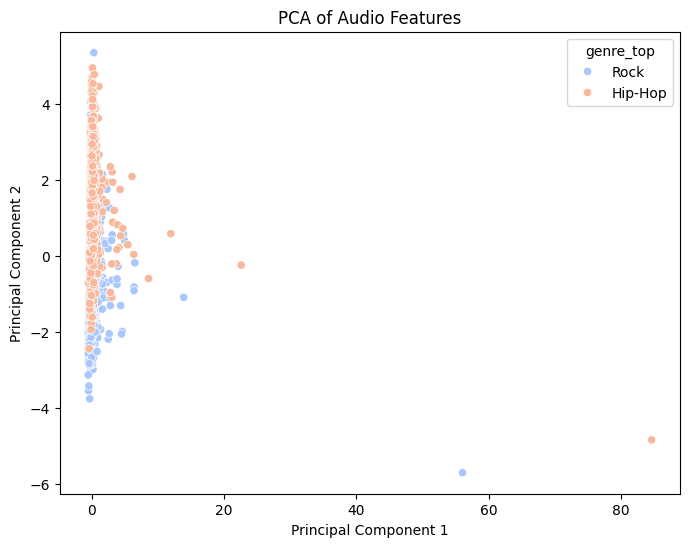

Logistic Regression Performance:
Accuracy: 0.90
Precision: 0.92
Recall: 0.96
F1 Score: 0.94


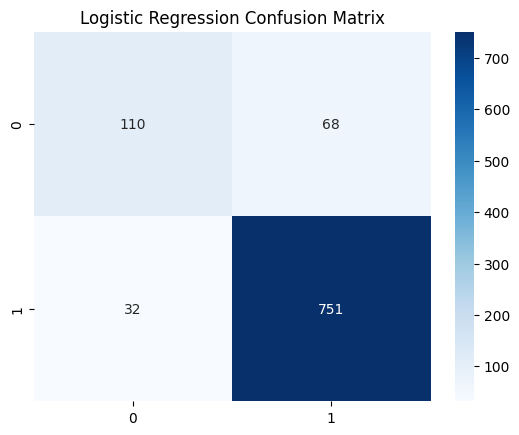

In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm')
plt.title('PCA of Audio Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg, pos_label='Rock'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg, pos_label='Rock'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg, pos_label='Rock'):.2f}")

conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


Decision Tree Performance:
Accuracy: 0.89
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


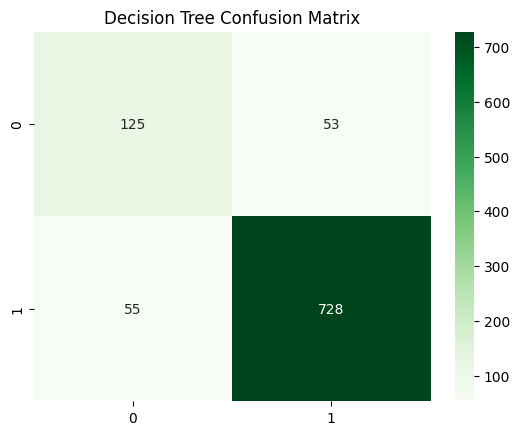

In [3]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_tree, pos_label='Rock'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_tree, pos_label='Rock'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tree, pos_label='Rock'):.2f}")

conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.show()